Praca domowa 6.
Agnieszka Kęska

In [38]:
import numpy as np

In [39]:
import pandas as pd

In [40]:
import seaborn as sns

In [41]:
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("Animation_Movies.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [43]:
df.shape

(916, 23)

In [44]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
                         ...   
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
Length: 23, dtype: object

In [45]:
df.isna().sum().sum()

0

1. Ramka danych df zawiera dane dotyczące filmów. Zbiór nie ma braków danych, ma 23 kolumny i 916 wierszy.
Zmienne jakościowe:
binarne: "adult",
nominalne: id,"title",backdrop_path,"status",original_title,genres,tagline,overview,poster_path,"original_language","production_companies","production_countries","spoken_languages"
Zmienne ilościociowe:
zliczeniowe: vote_count
ilorazowe: revenue,runtime, popularity,
przedziałowe: vote_average, release_date


2.

In [30]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,9.160000e+02,916.000000,916.000000,9.160000e+02,916.000000,9.160000e+02,916.000000
mean,3.733966e+05,6.511949,1416.815502,7.969158e+07,75.918122,2.239101e+07,24.118116
std,3.143739e+05,1.824529,3036.942790,1.968002e+08,32.350722,4.600886e+07,52.151381
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000
25%,6.071825e+04,6.171500,14.000000,0.000000e+00,67.750000,0.000000e+00,3.848750
50%,3.324640e+05,6.900500,154.000000,0.000000e+00,86.000000,0.000000e+00,13.136500
75%,5.870755e+05,7.443000,1062.500000,3.563947e+07,96.000000,1.585000e+07,26.216500
max,1.196409e+06,10.000000,19463.000000,1.450027e+09,210.000000,2.600000e+08,1008.942000


Wnioski: średnia ocena filmów to 6.5. Nie ma w naszym zbiorze filmów trwających dłużej niż 210 minut. 

3.

In [31]:
df.groupby("production_countries").popularity.agg("sum").sort_values(ascending = False).head(10)

production_countries
United States of America                      12864.625
Japan                                          3968.088
Canada, United States of America                678.466
Japan, United States of America                 556.617
Canada, France, United States of America        484.876
United Kingdom, United States of America        249.776
China, France                                   212.626
Australia, United States of America             152.997
China, Hong Kong, United States of America      132.868
Spain, United States of America                 125.169
Name: popularity, dtype: float64

Wniosek: Najwięcej filmów produkują USA, Japonia i Kanada.

In [32]:
df.groupby("production_countries").popularity.agg("sum").sort_values(ascending = True).head(10)

production_countries
Argentina                       0.6
Malaysia, Pakistan, Turkey      0.6
Mexico, Norway                  0.6
Netherlands, France, Belgium    0.6
Estonia, Finland                0.6
New Zealand                     0.6
North Korea, South Korea        0.6
Singapore                       0.6
Slovakia                        0.6
Iran                            0.6
Name: popularity, dtype: float64

Najmniej filmów produkują Argentina, Malaysia,Slovakia,New Zealand i Iran.

In [33]:
df.groupby("production_companies").vote_average.agg(["mean","count"]).sort_values(by=["count", "mean"],ascending = False).head(10)

,mean,count
production_companies,,
"Pixar, Walt Disney Pictures",7.482214,14
Walt Disney Productions,6.983462,13
Toei Animation,6.893917,12
Pixar,7.278545,11
"Walt Disney Pictures, Pixar",6.726667,9
Big Idea Productions,5.629556,9
"Walt Disney Pictures, Walt Disney Animation Studios",7.262000,8
"Walt Disney Animation Studios, Walt Disney Pictures",6.409875,8
"Walt Disney Pictures, Walt Disney Feature Animation",7.186714,7


In [ ]:
Wnioski: Najwięksi producenci to Pixar, Walt Disney Pictures, Toei Animation.

4.

In [34]:
df.groupby("genres")["popularity"].agg("mean")

genres
Action, Adventure, Animation                                                               9.0630
Action, Adventure, Animation, Comedy                                                       1.0160
Action, Adventure, Animation, Comedy, Family                                              32.7915
Action, Adventure, Animation, Crime, Science Fiction                                       3.7130
Action, Adventure, Animation, Family                                                      29.7792
                                                                                           ...   
Science Fiction, Romance, Action, Animation                                                3.0790
TV Movie, Animation, Science Fiction, Action, Adventure, Comedy, Drama, Fantasy, Music    16.7660
Thriller, Action, Animation, Science Fiction                                              11.8640
Thriller, Animation, Action, Crime                                                        13.2960
War, Action, 

4.

In [47]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

<function matplotlib.pyplot.show(close=None, block=None)>

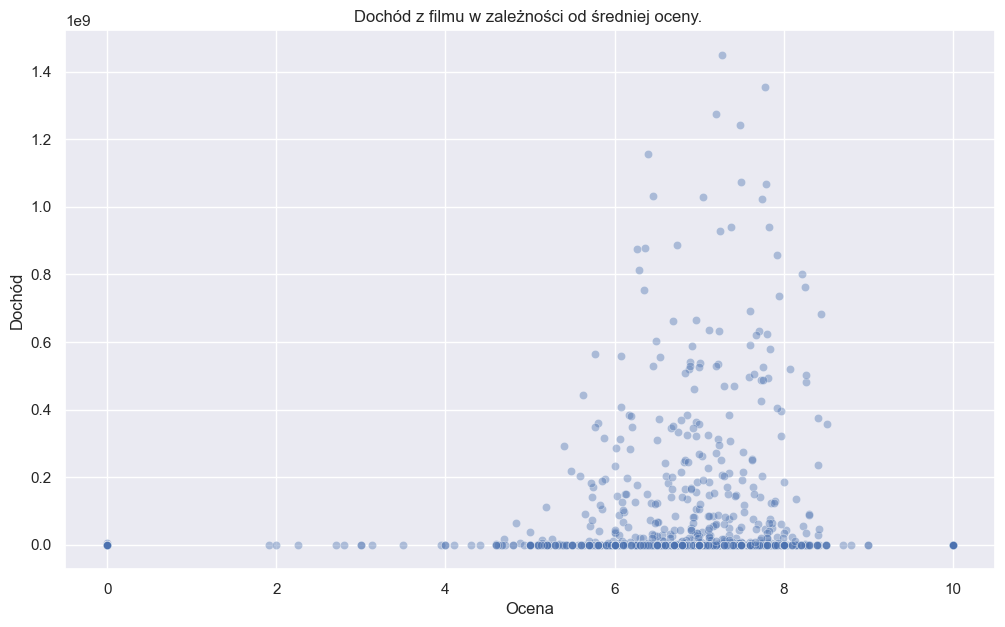

In [36]:
sns.scatterplot(data = df, x = "vote_average", y = "revenue", alpha=0.4)
plt.title("Dochód z filmu w zależności od średniej oceny. ")
plt.xlabel("Ocena")
plt.ylabel("Dochód")
plt.show

Powyższy wykres przedstawia dochód z filmu, a jego średnią ocenę. Można zaobserwować, że większośc z nich znajduje się w widełkach ocen od 6 do 8. Nie widać znaczącej zależności.

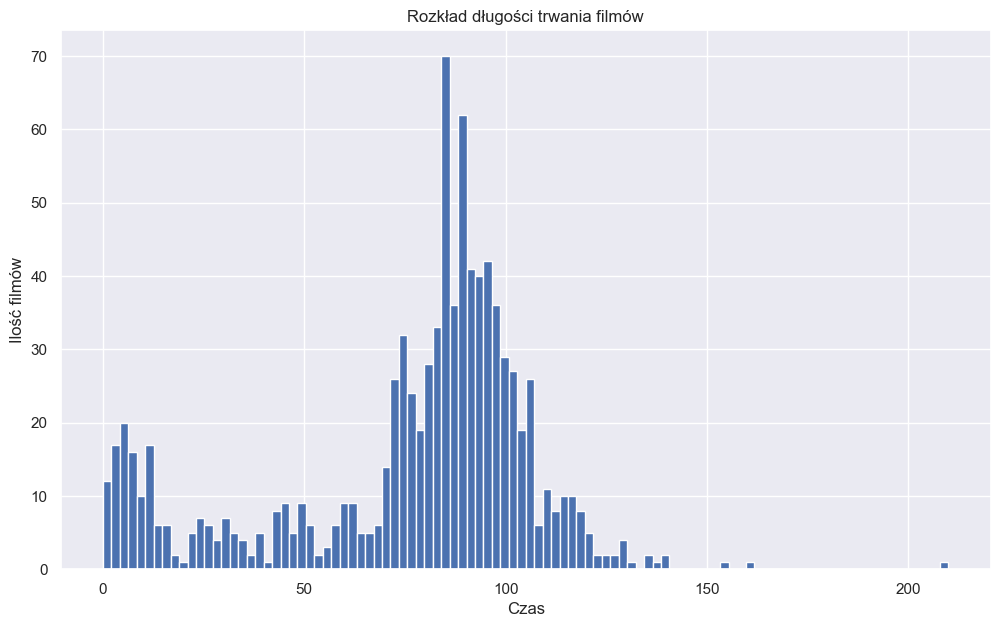

In [48]:
plt.hist(df["runtime"], 100)
plt.title("Rozkład długości trwania filmów")
plt.ylabel("Ilość filmów")
plt.xlabel("Czas")
plt.show()

Z powyższego wykresu możemy wywnioskować, że najwięcej filmów trwa od 75 do 110 minut.